# Working with Data

### Agenda

* The process of data analysis
* Libraries – pandas, dfply, arrow (dates)
* Data frames
* Reading data into R
* Querying data
* Aggregation
* Creating new variables
* Writing the output to a file.
* Exercise

### The Process of Data Analysis

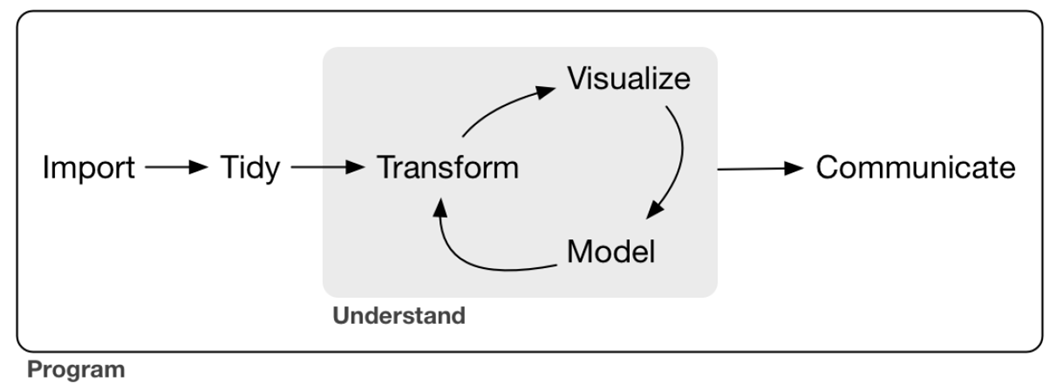

### Dataframes

* Represents a rectangular table of data.
* Contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). 
* Has both a row and column index; it can be thought of as a dictionary of *Series* all sharing the same index.
  - A Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
* Many libraries; we will use Pandas. Install Pandas using ```pip install pandas```.
  - For more information see the Pandas [https://pandas.pydata.org](https://pandas.pydata.org)

### Data Formats

Pandas can read many file formats:

* Excel
* CSV
* Databases
* Websites
* Other formats - JSON, Parquet, XML, etc.

### Importing packages

* Packages (function libraries) can be installed using ```pip```
* Packages (or functions within packages) must be *imported* before being used.
    - e.g. ```import pandas as pd``` or ```from random import uniform```

In [1]:
import pandas as pd

Pandas can read data from a number of different formats.

In [2]:
df = pd.read_csv("zomato_dataset.csv")

We now have a dataframe named *df*.

Dataframes have an attribute called "shape" given by a tuple: (rows, columns)

In [3]:
df.shape

(123657, 12)

In [4]:
print("The dataframe contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataframe contains 123657 rows and 12 columns.


It is a good idea to look at the first few rows (head) of the dataframe.

In [5]:
# By default head() returns 5 rows. 
# You can pass a parameter n= if you want a different number of rows.
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


What are the data types of each column?

In [6]:
df.dtypes

Restaurant Name     object
Dining Rating      float64
Delivery Rating    float64
Dining Votes         int64
Delivery Votes       int64
Cuisine             object
Place Name          object
City                object
Item Name           object
Best Seller         object
Votes                int64
Prices             float64
dtype: object

### Referring to Columns

* Refer to columns using the '.' notation or using [].
* e.g. the City column can be referred to as df.City or df['City']

How many cities does the dataset include

In [7]:
df['City'].unique()

array([' Hyderabad', ' Mumbai', ' Chennai', ' Pune', ' Jaipur', ' Kochi',
       ' Goa', ' Bangalore', ' Kolkata', ' Ahmedabad', ' Banaswadi',
       ' Ulsoor', ' Malleshwaram', ' Magrath Road', ' Lucknow',
       ' New Delhi', ' Raipur'], dtype=object)

How many records are there for each city?

In [8]:
df['City'].value_counts()

City
 Hyderabad       15613
 Jaipur          14438
 Mumbai          13535
 Chennai         13100
 Bangalore       12040
 Ahmedabad       10178
 Kolkata          8662
 Pune             8067
 Kochi            7759
 Raipur           7700
 Lucknow          6455
 New Delhi        3490
 Goa              2360
 Banaswadi          97
 Ulsoor             66
 Magrath Road       54
 Malleshwaram       43
Name: count, dtype: int64

How many records are there for Ahmedabad?

Hint:

```df['City'].value_counts()``` is a Series. It can be queried like a dictionary.

In [9]:
# What's the problem?
# df['City'].value_counts()['Ahmedabad']

The City column contains leading spaces. We need to strip the spaces from the beginning and end of the data.

In [10]:
df['City'] = df['City'].str.strip()

In [11]:
df['City'].value_counts()['Ahmedabad']

10178

Basic statistics on a dataframe or a column can be obtained using describe.

In [12]:
df.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


### Renaming columns

* Use the rename() method of the dataframe
* Pass a dictionary {'old name': 'new name', ...} and axis=1 as parameters
* The operation returns a new dataframe with the renamed columns. To rename in place, pass inplace=True as a parameter.

In [13]:
df.rename({'Dining Rating': 'dining', 'Delivery Rating':'delivery'}, axis=1, inplace=True)

In [14]:
df.head(2)

,Restaurant Name,dining,delivery,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0


### Creating new columns

Create a new column named 'avg_rating' which is the average of the dining rating and the delivery rating.

In [15]:
df['avg_rating'] = (df['dining'] + df['delivery'])/2

In [16]:
df.head(2)

,Restaurant Name,dining,delivery,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,avg_rating
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0,4.05
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0,4.05


### Querying dataframes

Use the query() method of the dataframe. Pass a string with the query as a parameter. Notice how string parameters are passed. If there is a space in the column name, use backticks to enclose the column name. e.g. \`column name\`

Find all the restaurants in Ahmedabad that have more than 500 votes.

In [17]:
df.query("City == 'Ahmedabad' and Votes > 1000")

,Restaurant Name,dining,delivery,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,avg_rating
83258,Day 'N' Night,3.5,3.7,384,0,Street Food,Navrangpura,Ahmedabad,Punjabi Executive Lunch,BESTSELLER,1666,160.0,3.60
83259,Day 'N' Night,3.5,3.7,384,0,Street Food,Navrangpura,Ahmedabad,Punjabi Executive Lunch,BESTSELLER,1666,160.0,3.60
83310,Day 'N' Night,3.5,3.7,384,0,Street Food,Navrangpura,Ahmedabad,Punjabi Executive Lunch,BESTSELLER,1666,160.0,3.60
85371,Iscon Thal,4.0,3.9,444,0,Gujarati,Satellite,Ahmedabad,Corporate Pack (Lunch),BESTSELLER,1100,249.0,3.95
85373,Iscon Thal,4.0,3.9,444,0,Gujarati,Satellite,Ahmedabad,Mini Lunch Combo [Lunch],BESTSELLER,1210,225.0,3.95
85385,Iscon Thal,4.0,3.9,444,0,Gujarati,Satellite,Ahmedabad,Corporate Pack (Lunch),BESTSELLER,1100,249.0,3.95
85391,Iscon Thal,4.0,3.9,444,0,Gujarati,Satellite,Ahmedabad,Mini Lunch Combo [Lunch],BESTSELLER,1210,225.0,3.95


### Aggregation

You can calculate aggregate statistics by groups.

e.g. What would be the average dining and delivery ratings by city? Display the result with the cities in alphabetical order.

In [18]:
df.groupby('City').agg({'dining': 'mean', 'delivery':'mean'}).sort_index()

,dining,delivery
City,,
Ahmedabad,3.782658,3.915288
Banaswadi,3.700000,3.800000
Bangalore,3.762274,3.972068
Chennai,3.819361,3.958954
Goa,4.059551,3.868833
Hyderabad,3.891525,4.000206
Jaipur,3.769693,4.002062
Kochi,3.819516,3.918252
Kolkata,3.841879,3.976483


What would be the average dining and delivery ratings by city? Also display the number of votes for each city and sort the result in descending order of the number of votes.

In [19]:
df.groupby('City') \
    .agg({'dining': 'mean',
          'delivery':'mean',
          'Votes': 'count'
         }) \
    .sort_values('Votes', ascending=False)

,dining,delivery,Votes
City,,,
Hyderabad,3.891525,4.000206,15613
Jaipur,3.769693,4.002062,14438
Mumbai,3.841823,3.939960,13535
Chennai,3.819361,3.958954,13100
Bangalore,3.762274,3.972068,12040
Ahmedabad,3.782658,3.915288,10178
Kolkata,3.841879,3.976483,8662
Pune,3.720753,4.018615,8067
Kochi,3.819516,3.918252,7759


There can be multiple levels of groups. Here we group by City and Cuisine (notice the name of the Cuisine variable).

In [20]:
df.groupby(['City', 'Cuisine ']) \
    .agg({'dining': 'mean',
          'delivery':'mean',
          'Votes': 'count'
         }) \
    .sort_index()

dining  delivery  Votes
City      Cuisine                             
Ahmedabad American   3.300000  3.900000     46
          Beverages  3.743591  3.918128   3547
          Biryani    3.635354  3.588384    198
          Chinese    4.233426  3.932869    359
          Desserts   3.835457  4.106481   1219
...                       ...       ...    ...
Pune      Pizza      4.000000  4.300000    144
          Shake      4.003125  4.237500     96
          Sichuan    3.809318  3.906054    991
Raipur    Pizza      3.855809  3.917838   7700
Ulsoor    Desserts        NaN  4.000000     66

[216 rows x 3 columns]

### Saving the output

Use the to_*format*() method of the dataframe. Pass the name of the file in which you want to save the data as a parameter. e.g. df.to_csv("filename.csv")

In [21]:
df_result = df.groupby(['City', 'Cuisine ']) \
                .agg({'dining': 'mean',
                      'delivery':'mean',
                      'Votes': 'count'
                     }) \
                .sort_index()

df_result.to_csv("zomato_result.csv")

### Alternatives

The ```dplyr``` package from R has a much cleaner API.

```dfply``` is an attempt to duplicate these features for use in Python.

For more information, see [https://github.com/kieferk/dfply](https://github.com/kieferk/dfply)

#### Additional topics

* Working with dates
  - R has the ```lubridate``` package to make working with dates easier.
  - While Pandas has some date handling functionality, the ```arrow``` package for Python is specially developed to handle dates.


* Applying arbitrary functions.